In [100]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import quad

In [101]:
#Fast pulse definition
def FastPulse(w0, gamma, alphap, delta, area, t):
    
    E_0 = area/np.sqrt(2*np.pi) #Amplitud --- Area of pure gaussian pulse: sqrt(2*pi)

    #Pulse with chirp and Noch
    g1 = np.exp(-.5*((t**2)*(gamma**(-2)+1j*alphap)/(gamma**(-4)+alphap**2) + 2j*w0*t))/np.sqrt(gamma**(-2)-1j*alphap)
    g2 = np.exp(-.5*((t**2)*(gamma**(-2)+delta**(-2)+1j*alphap)/((gamma**(-2)+delta**(-2))**2+alphap**2) + 2j*w0*t))/np.sqrt(gamma**(-2)+delta**(-2)-1j*alphap)
    
    return E_0*(g1-g2)

def Noch(w0, gamma, alphap, delta, area, t):
    
    E_0 = area/np.sqrt(2*np.pi) #Amplitud --- Area of pure gaussian pulse: sqrt(2*pi)

    #Noch
    g2 = np.exp(-.5*((t**2)*(gamma**(-2)+delta**(-2)+1j*alphap)/((gamma**(-2)+delta**(-2))**2+alphap**2) + 2j*w0*t))/np.sqrt(gamma**(-2)+delta**(-2)-1j*alphap)
    
    return E_0*(g2)

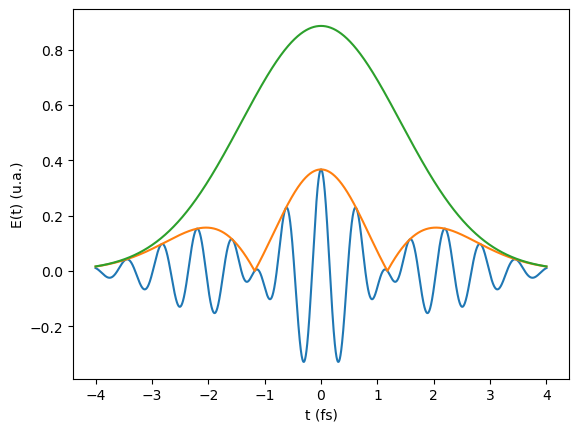

In [131]:
#Parameters
w0 = 10             #Central frecuency
area = np.pi        #Area of pure gaussian pulse
gamma = 1          #Spectral width
alphap = 0         #Chrip constant
delta = 1      #Noch spectral width




#plot
T = 4*np.sqrt((1+(alphap**2)*(gamma**4))/gamma**2)
time = np.linspace(-T, T, 10000)
pulse = FastPulse(w0, gamma, alphap, delta, area, time)

plt.plot(time, np.real(pulse))      #real part of the pulse
plt.plot(time, np.abs(pulse))       #Envelope
plt.plot(time, np.abs(Noch(w0, gamma, alphap, delta, area, time))) 

plt.xlabel('t (fs)')
plt.ylabel('E(t) (u.a.)')

plt.show()


In [126]:
#Pulse area
quad(lambda t: np.abs(FastPulse(w0, gamma, alphap, delta, area, t)), -np.inf, np.inf)[0]

1.0434113560427998

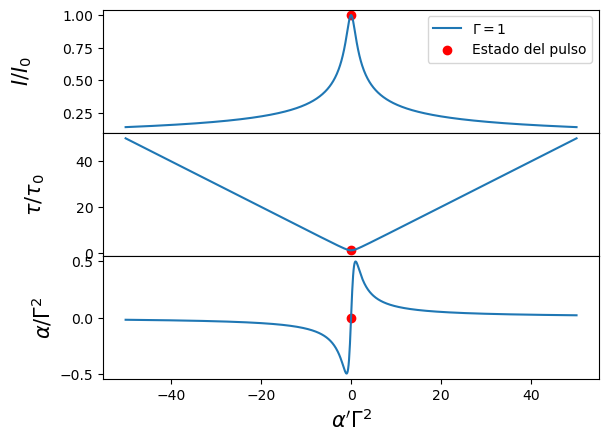

In [127]:
#Different parameters as a function of the chirp parameter alpha prime
Alphap = np.linspace(-50, 50, 1000)

#Pick intensity
def Intensity(alphap): return np.abs(FastPulse(w0, gamma, alphap, 1e-10, area, 0))

Intensity = np.vectorize(Intensity)

#Time amplitude
def Tau(Alphap): return np.sqrt(gamma**(-4)+Alphap**2)/gamma

#Chrip alpha
def Alpha(Alphap): return Alphap/(gamma**(-4)+Alphap**2)

fig = plt.figure()
fig.subplots_adjust(hspace=0)

ax1 = fig.add_subplot(3,1,1)
ax1.plot(Alphap*gamma**2, Intensity(Alphap)/np.abs(FastPulse(w0, gamma, 0, 1e-10, area, 0)), label = r'$\Gamma = {}$'.format(gamma))
ax1.scatter(alphap*gamma**2, Intensity(alphap)/np.abs(FastPulse(w0, gamma, 0, 1e-10, area, 0)), color = 'red', label='Estado del pulso')
ax1.set_ylabel(r'$I/I_0$'+'\n', size=15)
ax1.legend()

ax2 = fig.add_subplot(3,1,2)
ax2.plot(Alphap*gamma**2, Tau(Alphap)*gamma)
ax2.scatter(alphap*gamma**2, Tau(alphap)*gamma, color = 'red')
ax2.set_ylabel(r'$\tau/\tau_0$'+'\n', size=15)

ax3 = fig.add_subplot(3,1,3)
ax3.plot(Alphap*gamma**2, Alpha(Alphap)/gamma**2)
ax3.scatter(alphap*gamma**2, Alpha(alphap)/gamma**2, color = 'red')
ax3.set_ylabel(r'$\alpha/\Gamma^2$', size=15)

plt.xlabel(r"$\alpha'\Gamma^2$", size=15)

plt.show()

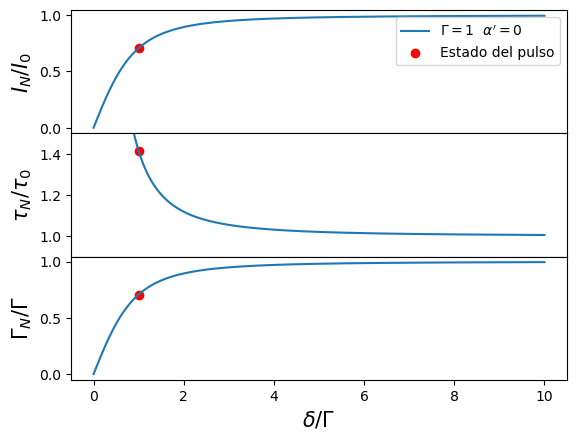

In [136]:
#Different parameters of the noch as a function of the noch's parameter delta
Delta = np.linspace(1e-10, 10, 1000)

#Pick intensity
def Noch_Intensity(delta_): return np.abs(Noch(w0, gamma, alphap, delta_, area, 0))

Intensity = np.vectorize(Intensity)

#Time amplitude
def Noch_Tau(delta_): return np.sqrt(1 + (delta_**(-2)))

#Espectral amplitude
def Noch_Gamma(delta_): return gamma*delta_/np.sqrt(gamma**2 + delta_**2)

fig = plt.figure()
fig.subplots_adjust(hspace=0)

ax1 = fig.add_subplot(3,1,1)
ax1.plot(Delta/gamma, Noch_Intensity(Delta)/np.abs(FastPulse(w0, gamma, 0, 1e-10, area, 0)), label = r"$\Gamma = {} \ \ \alpha'={}$".format(gamma, alphap))
ax1.scatter(delta/gamma, Noch_Intensity(delta)/np.abs(FastPulse(w0, gamma, 0, 1e-10, area, 0)), color = 'red', label='Estado del pulso')
ax1.set_ylabel(r'$I_N/I_0$', size=15)
ax1.legend()

ax2 = fig.add_subplot(3,1,2)
ax2.plot(Delta/gamma, Noch_Tau(Delta)*gamma)
ax2.scatter(delta/gamma, Noch_Tau(delta)*gamma, color = 'red')
ax2.set_ylabel(r'$\tau_N/\tau_0$', size=15)
ax2.set_ylim(.9, 1.5)

ax3 = fig.add_subplot(3,1,3)
ax3.plot(Delta/gamma, Noch_Gamma(Delta)/gamma)
ax3.scatter(delta/gamma, Noch_Gamma(delta)/gamma, color = 'red')
ax3.set_ylabel(r'$\Gamma_N/\Gamma$', size=15)

plt.xlabel(r"$\delta/\Gamma$", size=15)

plt.show()

/home/ju/miniconda3/lib/python3.12/site-packages/scipy/integrate/_quadpack_py.py:613: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagie(func, bound, infbounds, args, full_output,
/tmp/ipykernel_65986/2310635230.py:2: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  return quad(lambda t: E(t)*np.exp(1j*w*t), -np.inf, np.inf)[0]
/tmp/ipykernel_65986/2310635230.py:2: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calli

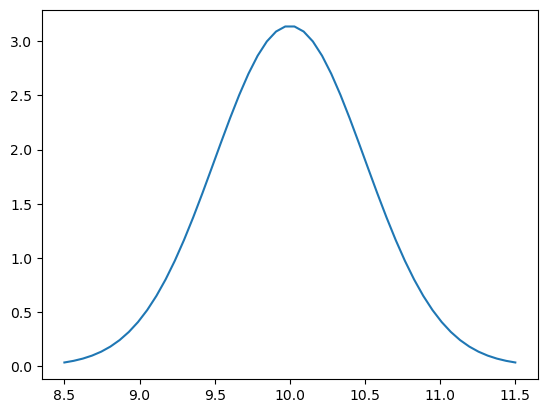

In [73]:
def spectrum(E, w):
    return quad(lambda t: E(t)*np.exp(1j*w*t), -np.inf, np.inf)[0]

spectrum = np.vectorize(spectrum)

frecuency = np.linspace(-3*gamma, 3*gamma) + w0
spec = spectrum(lambda t: FastPulse(w0, gamma, alphap, delta, area, t) ,frecuency)

plt.plot(frecuency, spec)

In [74]:
def wigner(t, w, E):
    return quad(lambda dt: (E(t+dt)*E(t-dt).conjugate())*np.exp(1j*w*dt), -np.inf, np.inf)[0]

def wignerFunction(E, tau, gamma, w0, N):

    time = np.linspace(-3*tau, 3*tau, N)
    frecuency = np.linspace(-3*gamma, 3*gamma, N) + w0
    sol = np.zeros((N,N))

    for ii, tt in enumerate(time):
        for jj, ww in enumerate(frecuency):
            sol[ii, jj] = wigner(tt, ww, E)

    return sol

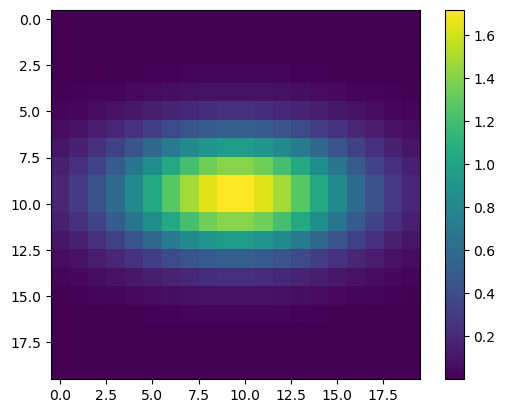

In [75]:
plt.imshow(wignerFunction(lambda t: np.exp(-.5*t**2), 1, 1, 0, 20))
plt.colorbar()

In [76]:
Tau(0)

8.0